<a href="https://colab.research.google.com/github/portkey2112/elementary_deep_learning/blob/nn_using_numpy/NN_from_scratch_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import json

In [ ]:
X, Y = datasets.fetch_openml('mnist_784', version=1, return_X_y=True)

In [ ]:
#X.shape
#X[0]

X = X.astype(np.float32)
X /= 255.

In [ ]:
#y.shape
Y = Y.astype(np.int32)
Y = Y.reshape(Y.shape[0], 1)
Y.shape

(70000, 1)

array([0], dtype=int32)

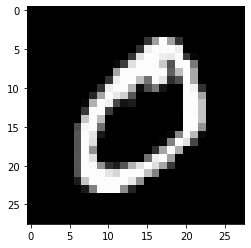

In [ ]:
plt.imshow(X[1].reshape(28, 28), cmap='gray')
Y[1]

In [ ]:
#datasets %: 60: 20: 20
#looks like the dataset is already shuffled.

X = X.T
Y = Y.T

total = Y.shape[1]
m = (60/100) * total
m_dev = (20/100) * total
m_test = (20/100) * total

print(m, m_dev, m_test)

42000.0 14000.0 14000.0


In [ ]:
X_train = X[:, 0:42000]
Y_train = Y[:, 0:42000]

In [ ]:
X_dev = X[:, 42000:56000]
Y_dev = Y[:, 42000:56000]

In [ ]:
X_test = X[:, 56000:]
Y_test = Y[:, 56000:]

In [ ]:
X_test = X[:, 56000:]
Y_test = Y[:, 56000:]

In [ ]:
print('X_train.shape ', X_train.shape)
print('Y_train.shape ', Y_train.shape)

print('X_dev.shape ', X_dev.shape)
print('Y_dev.shape ', Y_dev.shape)

print('X_test.shape ', X_test.shape)
print('Y_test.shape ', Y_test.shape)

X_train.shape  (784, 42000)
Y_train.shape  (1, 42000)
X_dev.shape  (784, 14000)
Y_dev.shape  (1, 14000)
X_test.shape  (784, 14000)
Y_test.shape  (1, 14000)


In [ ]:
layers = [784, 1568, 1568, 10]

In [ ]:
def sigmoid(z):
    return 1/ (1 + np.exp(-z))

sigmoid(0)

0.5

In [ ]:
def relu(z):
    return np.array([i if(i >= 0) else 0 for i in z])

relu(np.array([1, 2, -1 ,0, 2]))

array([1, 2, 0, 0, 2])

In [ ]:
def init(layers):
    num_layers = len(layers)
    params = {}
    
    for i in range(1, num_layers):
        # init W to control vanishing/ exploding gradients problem
        params['W'+str(i-1)] = np.random.randn(layers[i], layers[i-1]) * np.sqrt(1/layers[i])  
        params['b'+str(i-1)] = np.zeros([layers[i], 1])
        print(params['W'+str(i-1)].shape)
        print(params['b'+str(i-1)].shape)
    
    return params

params = init(layers)
print(params)

(1568, 784)
(1568, 1)
(1568, 1568)
(1568, 1)
(10, 1568)
(10, 1)
{'W0': array([[-0.03916561,  0.01111939,  0.02191535, ...,  0.00914804,
         0.01026842,  0.01301973],
       [ 0.01049816,  0.05065812, -0.0420527 , ..., -0.00963657,
        -0.03579707,  0.0007283 ],
       [-0.02805569,  0.03240664, -0.03462926, ...,  0.01511536,
        -0.0203059 , -0.01719519],
       ...,
       [-0.01347002, -0.02574748, -0.00053602, ..., -0.01023363,
         0.01648383, -0.03472547],
       [-0.00851384, -0.00225596, -0.01565225, ...,  0.00257248,
         0.02016894, -0.01023506],
       [-0.04432075, -0.03047809, -0.01922702, ...,  0.04903839,
         0.03731996, -0.02814069]]), 'b0': array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]]), 'W1': array([[ 0.0208112 , -0.00336528,  0.0196669 , ..., -0.00685239,
         0.05682916, -0.06676359],
       [ 0.00942678, -0.03282742,  0.00468103, ..., -0.0021167 ,
         0.00225711, -0.01456269],
       [ 0.

In [ ]:
def softmax(Z):
    '''
    Z = np.exp(Z)
    m = Z.shape[1]
    for i in range(m):
        temp = np.sum(Z[:, i])
        Z[:, i] = Z[:, i]/ temp
        #print(Z[:, i])
    
    return Z 
    '''
    #print(np.sum(np.exp(Z), axis=0))
    #print("axis = 0", np.sum(np.exp(Z)))
    return np.exp(Z)/np.sum(np.exp(Z), axis=0)

In [ ]:
def one_hot_encode(Y, num_classes):
    m = Y.shape[1]
    print(type(Y[0][0]))
    Y_train = np.zeros((num_classes, Y.shape[1]))
    Y_train[Y, np.arange(m)] = 1
    print(np.arange(m).shape)
    print(Y.shape)
    return Y_train


Y_train_oneHot = one_hot_encode(Y_train, 10)
print(Y_train)
print(Y_train_oneHot)

<class 'numpy.int32'>
(42000,)
(1, 42000)
[[5 0 4 ... 2 7 0]]
[[0. 1. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
def forward_prop(X_train, Y_train, params, layers):
    n = X_train.shape[1]
    num_layers = len(layers)
    cache = {}
    cache['A0'] = X_train
    
    for i in range(1, num_layers):
        cache['Z'+str(i)] = np.dot(params['W' + str(i-1)], cache['A'+str(i-1)]) + params['b'+str(i-1)]
        if(i != num_layers-1):
            cache['A'+str(i)] = np.tanh(cache['Z'+str(i)])
        else:
            cache['A'+str(i)] = softmax(cache['Z'+str(i)])
        
        assert(cache['Z'+str(i)].shape[0] == params['W' + str(i-1)].shape[0] and cache['Z'+str(i)].shape[1] == n)

    return cache

cache = forward_prop(X_train, Y_train_oneHot, params, layers)

In [ ]:
def cost(Y, h):
    m = Y.shape[1]
    return -(1/m) * np.sum(np.sum(np.multiply(Y, np.log(h))))


print("cost = ", cost(Y_train_oneHot, cache['A3']))
print(cache['A3'])
print(cache['A3'].shape)
print(Y_train.shape)
print(Y_train_oneHot.shape)
print(cache['A3'][:,0])
print(np.sum(cache['A3'][:,0]))
print(np.sum(cache['A3'][:,1]))
print(np.sum(cache['A3'][:,2]))
print(np.sum(cache['A3'][:,3]))
cache['A3'].shape

cost =  3.6970026865897507
[[1.12419536e-03 3.18486280e-02 3.83470191e-04 ... 3.05665212e-03
  1.94987119e-03 8.58459553e-04]
 [9.72033045e-02 2.00600290e-01 1.79534467e-03 ... 5.44199216e-01
  7.51519429e-01 5.69174856e-01]
 [4.33340150e-04 4.92592288e-02 8.75860845e-01 ... 1.12232544e-03
  2.14793998e-03 1.19822221e-02]
 ...
 [1.01101564e-02 2.26387365e-02 1.27478503e-03 ... 5.33824939e-03
  3.27730590e-02 1.40115541e-02]
 [2.93965235e-04 4.15163171e-03 1.85253805e-03 ... 7.26295090e-06
  1.61284532e-04 2.38696579e-03]
 [3.87660152e-02 2.04235830e-01 3.07746629e-02 ... 3.07143956e-04
  1.47005397e-02 3.87462990e-02]]
(10, 42000)
(1, 42000)
(10, 42000)
[1.12419536e-03 9.72033045e-02 4.33340150e-04 7.35336424e-01
 1.08261215e-01 1.28189370e-03 7.18948989e-03 1.01101564e-02
 2.93965235e-04 3.87660152e-02]
1.0
0.9999999999999998
0.9999999999999999
0.9999999999999999


(10, 42000)

In [ ]:
#https://peterroelants.github.io/posts/cross-entropy-softmax/
def backprop(X_train, Y_train, params, cache):
    
    m = X_train.shape[1]
    
    print(Y_train.shape)
    print(cache['A3'].shape)
    
    #important to multiply with 1/m. we are taking average in the next steps
    #important: its (A3 - Y) and not (Y - A3)! Use the latter and see the cost INCREASING in every iter! So, DONT.
    dZ3 = (1/m)*(cache['A3'] - Y_train)    
    assert(dZ3.shape == cache['Z3'].shape)
    
    dW2 = np.dot(dZ3, cache['A2'].T)
    assert(dW2.shape == params['W2'].shape)
    
    db2 = np.sum(dZ3, axis=1, keepdims=True)
    assert(db2.shape == params['b2'].shape)
    
    dA2 = np.dot(params['W2'].T, dZ3)
    assert(dA2.shape == cache['A2'].shape)
    
    dZ2 = np.multiply(dA2, 1 - np.power(cache['A2'], 2))
    assert(dZ2.shape == cache['Z2'].shape)
    
    dW1 = np.dot(dZ2, cache['A1'].T)
    assert(dW1.shape == params['W1'].shape)
    
    db1 = np.sum(dZ2, axis=1, keepdims=True)
    assert(db1.shape == params['b1'].shape)
    
    dA1 = np.dot(params['W1'].T, dZ2)
    assert(dA1.shape == cache['A1'].shape)
    
    dZ1 = np.multiply(dA1, 1 - np.power(cache['A1'], 2))
    assert(dZ1.shape == cache['Z1'].shape)
    
    dW0 = np.dot(dZ1, cache['A0'].T)
    assert(dW0.shape == params['W0'].shape) 
    
    db0 = np.sum(dZ1, axis=1, keepdims=True)
    assert(db0.shape == params['b0'].shape)
    
    grads = {'dW0': dW0, 'db0': db0, 'dW1': dW1, 'db1': db1, 'dW2': dW2, 'db2': db2}
    return grads
    
grads = backprop(X_train, Y_train_oneHot, params, cache)

(10, 42000)
(10, 42000)


In [ ]:
def update_params(params, grads, learning_rate=0.001):
    params['W0'] = params['W0'] - learning_rate * grads['dW0']
    params['b0'] = params['b0'] - learning_rate * grads['db0']
    params['W1'] = params['W1'] - learning_rate * grads['dW1']
    params['b1'] = params['b1'] - learning_rate * grads['db1']
    params['W2'] = params['W2'] - learning_rate * grads['dW2']
    params['b2'] = params['b2'] - learning_rate * grads['db2']
    
    return params

params = update_params(params, grads)

In [ ]:
def unroll(params):
    #theta = np.zeros((-1, 1))
    
    for ind in ['W0', 'b0', 'W1', 'b1', 'W2', 'b2']:
        print(params[ind].shape,"+++++")
        print(params[ind].reshape(-1, 1).shape,"______")
        p = params[ind].reshape(-1, 1)
        if(ind == 'W0'):
            theta = p
        else:
            theta = np.concatenate((theta, p), axis = 0)
        print(p.shape)
        print(theta.shape)
        #print(theta)
        
    return theta

unroll_params = unroll(params)

(1568, 784) +++++
(1229312, 1) ______
(1229312, 1)
(1229312, 1)
(1568, 1) +++++
(1568, 1) ______
(1568, 1)
(1230880, 1)
(1568, 1568) +++++
(2458624, 1) ______
(2458624, 1)
(3689504, 1)
(1568, 1) +++++
(1568, 1) ______
(1568, 1)
(3691072, 1)
(10, 1568) +++++
(15680, 1) ______
(15680, 1)
(3706752, 1)
(10, 1) +++++
(10, 1) ______
(10, 1)
(3706762, 1)


In [ ]:
#layers = [784, 1568, 1568, 10]
def roll(theta):
    sh1 = (1568, 784)   #shape of w1
    ele1 = 1568 * 784   # no. of elements in w1
    sh2 = (1568, 1568)
    ele2 = 1568 * 1568
    sh3 = (10, 1568)
    ele3 = 10 * 1568
    
    l1 = 784     #no. of units in layer 1
    l2 = 1568
    l3 = 1568
    l4 = 10
    
    params = {}
    
    params['W0'] = theta[0:ele1, :].reshape(sh1)
    params['b0'] = theta[ele1:ele1+l2, :].reshape(l2, 1)
    assert(params['W0'].shape == sh1)
    assert(params['b0'].shape == (l2, 1))
    
    params['W1'] = theta[ele1+l2 : ele1+l2+ele2, :].reshape(sh2)
    params['b1'] = theta[ele1+l2+ele2 : ele1+l2+ele2+l3, :].reshape(l3, 1)
    assert(params['W1'].shape == sh2)
    assert(params['b1'].shape == (l3, 1))
    
    params['W2'] = theta[ele1+l2+ele2+l3: ele1+l2+ele2+l3+ele3, : ].reshape(sh3)
    params['b2'] = theta[ele1+l2+ele2+l3+ele3: , :].reshape(l4, 1)
    assert(params['W2'].shape == sh3)
    assert(params['b2'].shape == (l4, 1))
    
    return params

rolled_params = roll(unroll_params)

In [ ]:
#works fine. gradient check and backprop :D
#Had executed it before and compared the params. Did not do it again as
#gradient check takes a looong time!
'''
def gradient_check(X, Y, epsilon, layers):
    units = np.array([784, 1568, 1568, 10])
    params = init(units)
    num_layers = 4
    
    cache = forward_prop(X, Y, params, layers)
    grads = backprop(X, Y, params, cache)
    
    theta = unroll(params)
    num_theta = theta.shape[0]
    
    approx_grads = np.zeros((num_theta, 1))
    
    for i in range(num_theta):
        print('i = {}---------------'.format(i))
        theta_plus = np.copy(theta)
        theta_plus[i][0] += epsilon
        
        params_plus = roll(theta_plus)
        
        cache = forward_prop(X, Y, params_plus, layers)
        cost_plus = cost(Y, cache['A3'])
        
        theta_minus = np.copy(theta)
        theta_minus[i][0] -= epsilon
        
        params_minus = roll(theta_minus)
        
        cache = forward_prop(X, Y, params_minus, layers)
        cost_minus = cost(Y, cache['A3'])
        
        approx_grads[i][0] = (cost_plus - cost_minus) / (2 * epsilon)
        
        #print(grads[i][0])
        print(approx_grads[i][0])
        print('_________________________________________________________________________________')
        
    print("_____________________GRADS______________________")
    print(grads)
    
    print("___________________APPROXX_ +GRADS_________________")
    print(approx_grads)
    
    return grads, approx_grads
    

actual_grads, approx_grads = gradient_check(X_train, Y_train_oneHot, 0.00001, layers)
'''



'\ndef gradient_check(X, Y, epsilon, layers):\n    units = np.array([784, 1568, 1568, 10])\n    params = init(units)\n    num_layers = 4\n    \n    cache = forward_prop(X, Y, params, layers)\n    grads = backprop(X, Y, params, cache)\n    \n    theta = unroll(params)\n    num_theta = theta.shape[0]\n    \n    approx_grads = np.zeros((num_theta, 1))\n    \n    for i in range(num_theta):\n        print(\'i = {}---------------\'.format(i))\n        theta_plus = np.copy(theta)\n        theta_plus[i][0] += epsilon\n        \n        params_plus = roll(theta_plus)\n        \n        cache = forward_prop(X, Y, params_plus, layers)\n        cost_plus = cost(Y, cache[\'A3\'])\n        \n        theta_minus = np.copy(theta)\n        theta_minus[i][0] -= epsilon\n        \n        params_minus = roll(theta_minus)\n        \n        cache = forward_prop(X, Y, params_minus, layers)\n        cost_minus = cost(Y, cache[\'A3\'])\n        \n        approx_grads[i][0] = (cost_plus - cost_minus) / (2 * e

In [ ]:
#curr_params = {}
def model(X_train, Y_train, layers, iterations = 1000, learning_rate = 0.001):
    params = init(layers)
    num_layers = len(layers)
    costs = []
    
    for i in range(iterations):
        cache = forward_prop(X_train, Y_train, params, layers)
        grads = backprop(X_train, Y_train, params, cache) 
        cost_iter = cost(Y_train, cache['A'+str(num_layers-1)])
        costs.append(cost_iter)
        print('cost = {} on iteration {}'.format(cost_iter, i))
        params = update_params(params, grads, learning_rate)

    return costs, params

costs, params = model(X_train, Y_train_oneHot, layers, 400)

(1568, 784)
(1568, 1)
(1568, 1568)
(1568, 1)
(10, 1568)
(10, 1)
(10, 42000)
(10, 42000)
cost = 5.084525826936916 on iteration 0
(10, 42000)
(10, 42000)
cost = 4.060808482760459 on iteration 1
(10, 42000)
(10, 42000)
cost = 3.5395152962135876 on iteration 2
(10, 42000)
(10, 42000)
cost = 3.200387521215868 on iteration 3
(10, 42000)
(10, 42000)
cost = 2.9432494340811886 on iteration 4
(10, 42000)
(10, 42000)
cost = 2.7232144241666894 on iteration 5
(10, 42000)
(10, 42000)
cost = 2.52961075551256 on iteration 6
(10, 42000)
(10, 42000)
cost = 2.3585342120842867 on iteration 7
(10, 42000)
(10, 42000)
cost = 2.2070391998515113 on iteration 8
(10, 42000)
(10, 42000)
cost = 2.0727200547897633 on iteration 9
(10, 42000)
(10, 42000)
cost = 1.9535973800829345 on iteration 10
(10, 42000)
(10, 42000)
cost = 1.8479690353824596 on iteration 11
(10, 42000)
(10, 42000)
cost = 1.7542861647232315 on iteration 12
(10, 42000)
(10, 42000)
cost = 1.6710984985646369 on iteration 13
(10, 42000)
(10, 42000)
cos

In [ ]:
print(params['b0'].shape[0])
costs

1568


[5.084525826936916,
 4.060808482760459,
 3.5395152962135876,
 3.200387521215868,
 2.9432494340811886,
 2.7232144241666894,
 2.52961075551256,
 2.3585342120842867,
 2.2070391998515113,
 2.0727200547897633,
 1.9535973800829345,
 1.8479690353824596,
 1.7542861647232315,
 1.6710984985646369,
 1.5970575796626385,
 1.5309404866739498,
 1.471666920054845,
 1.4183018157597032,
 1.3700465230139165,
 1.3262239371933366,
 1.2862617535977872,
 1.2496762661440157,
 1.2160578469337366,
 1.1850584754579332,
 1.1563812875673987,
 1.1297719369423416,
 1.1050115047910023,
 1.0819106959730065,
 1.0603050876218378,
 1.0400512319572919,
 1.0210234499703408,
 1.0031111836287463,
 0.9862168002549334,
 0.970253763946295,
 0.9551451059488196,
 0.9408221394647053,
 0.9272233751384736,
 0.9142936019958848,
 0.9019831053753492,
 0.8902469987687258,
 0.8790446507743799,
 0.8683391917929976,
 0.8580970878477047,
 0.8482877711264784,
 0.8388833186374846,
 0.8298581718235976,
 0.8211888911689158,
 0.8128539408011819,

In [ ]:
def predict(params, X, Y, layers):
    cache = forward_prop(X, Y, params, layers)
    
    maxx = np.max(cache['A3'], axis = 0)
    one_hot_pred = np.where(maxx == cache['A3'], 1, 0)
    pred = [np.where(r==1)[0][0] for r in one_hot_pred.T]
    return np.array(pred).reshape(1, -1)

In [ ]:
'''
Accuracies:
75%: 500 epochs, 0.0001 lr and weights init to reduce exploding/ vanishing gradients. dev set - 75.5% test set - 77.33%
88%: 400 epochs, 0.001 lr and same weights as above; dev set - 87.8%, test set - 89.4%
'''

train_pred = predict(params, X_train, Y_train, layers)   #Not sending Y_train_oneHot here because we are using y with target numbers for caclulating accuracy

In [ ]:
def accuracy(Y, Y_pred):
    return np.sum(Y_pred == Y)/ Y.shape[1] * 100

train_accu = accuracy(Y_train, train_pred)

print(train_accu)


88.25952380952381


In [ ]:
dev_pred = predict(params, X_dev, Y_dev, layers)

In [ ]:
dev_accu = accuracy(Y_dev, dev_pred)

print(dev_accu)

87.82857142857144


In [ ]:
test_pred = predict(params, X_test, Y_test, layers)

In [ ]:
test_accu = accuracy(Y_test, test_pred)

print(test_accu)

89.4857142857143
